# Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



### 1) Gerando os dados

In [40]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

A função acima cria valores aleatórios de acordo com o RM do aluno inserido abaixo.

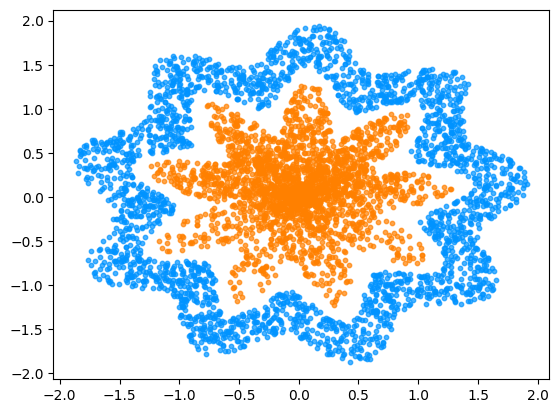

In [41]:
## coloque seu RM aqui!!
# RM = [9,x,x,x,x]

# nData = 100 * (sum(RM))
# nVertices = 1 * max(RM)

nData = 100 * 25
nVertices = 1 * 9

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1], alpha= 0.7, s = 10, color = '#0093FF') #azul
plt.scatter(c2[:,0],c2[:,1], alpha= 0.7, s = 10, color = '#FF8000') #laranja

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Parâmetros do algoritmo de adaptação
    - Função de ativação

### 2) Organizando

In [42]:
import pandas as pd

df_c1 = pd.DataFrame(c1, columns=['X', 'Y'])
df_c2 = pd.DataFrame(c2, columns=['X', 'Y'])

df_c1['cor'] = 0 # azul
df_c2['cor'] = 1 # laranja

df = pd.concat([df_c1, df_c2])

O código acima faz um dataset e a organização dos valores num plano cartesiano com X e Y, adicionando também uma coluna "cor".

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       5000 non-null   float64
 1   Y       5000 non-null   float64
 2   cor     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 156.2 KB


Dependendo do RM inserido, a quantidade de linhas pode variar.

In [44]:
df.head(5000)

,X,Y,cor
0,-0.074385,1.811037,0
1,1.668038,-0.107569,0
2,0.640989,-0.988067,0
3,-0.846045,-0.860232,0
4,0.359595,1.221767,0
...,...,...,...
2495,-0.060688,-0.013030,1
2496,-0.936511,0.086787,1
2497,-0.273491,-0.790135,1
2498,0.059348,0.167044,1


### 3) MLPClassifier

##### I. Separando

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns = ['cor'])
y = df['cor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

##### II. MLPClassifier mais parâmetros

In [46]:
model = MLPClassifier(hidden_layer_sizes=(243, 81, 27, 9, 3), activation='relu',
                    alpha=0.01, batch_size=16, max_iter=100,
                    solver='adam', random_state=100)

n_input_neurons = X_train.shape[1]
n_output_neurons = len(set(y_train))

n_params = (n_input_neurons + 1) * model.hidden_layer_sizes[0] # primeira camada
for i in range(1, len(model.hidden_layer_sizes)):
    n_params += (model.hidden_layer_sizes[i-1] + 1) * model.hidden_layer_sizes[i] # camadas ocultas
n_params += (model.hidden_layer_sizes[-1] + 1) * n_output_neurons # camada de saída
n_params += n_input_neurons * model.hidden_layer_sizes[0] # conexões entre a entrada e a primeira camada oculta

print(f"Total de parâmetros: {n_params}")

Total de parâmetros: 23483


In [47]:
model.fit(X_train, y_train)

y_test_prediction = model.predict(X_test)
y_train_prediction = model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_prediction)
acc_test = accuracy_score(y_test, y_test_prediction)
print(f'Acurácia dos testes: {acc_test:.4f}')
print(f'Acurácia dos treinos: {acc_train:.4f}')


Acurácia dos testes: 1.0000
Acurácia dos treinos: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


##### III. MLPClassifier menos parâmetros

In [48]:
model = MLPClassifier(hidden_layer_sizes=(5, 5, 1), activation='relu',
                    alpha=0.01, batch_size=16, max_iter=100,
                    solver='adam', random_state=100)

n_input_neurons = X_train.shape[1]
n_output_neurons = len(set(y_train))

n_params = (n_input_neurons + 1) * model.hidden_layer_sizes[0] # primeira camada
for i in range(1, len(model.hidden_layer_sizes)):
    n_params += (model.hidden_layer_sizes[i-1] + 1) * model.hidden_layer_sizes[i] # camadas ocultas
n_params += (model.hidden_layer_sizes[-1] + 1) * n_output_neurons # camada de saída
n_params += n_input_neurons * model.hidden_layer_sizes[0] # conexões entre a entrada e a primeira camada oculta

print(f"Total de parâmetros: {n_params}")

Total de parâmetros: 65


In [49]:
model.fit(X_train, y_train)

y_test_prediction = model.predict(X_test)
y_train_prediction = model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_prediction)
acc_test = accuracy_score(y_test, y_test_prediction)
print(f'Acurácia dos testes: {acc_test:.4f}')
print(f'Acurácia dos treinos: {acc_train:.4f}')


Acurácia dos testes: 0.9700
Acurácia dos treinos: 0.9778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4) TensorFlow keras

##### I. Modelo menos parâmetros

Note que em todas as camadas usei o regularizador L2 a fim de evitar o overfitting da máquina.

Na camada de saída, usei o SIGMOID como activation, pois como a saída vai ser uma classificação binária (ou 0 ou 1) resolvi usá-lo no lugar de RELU. No caso, o RELU foi usado, porque tem afinidade com relações não lineares e complexas, como no caso dos pontos azuis e laranjas.

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=5, input_shape=(2,), activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.Dense(units=5, activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation="sigmoid", kernel_regularizer = keras.regularizers.l2(0.01))
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 15        
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 batch_normalization_12 (Bat  (None, 5)                20        
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 71
Trainable params: 61
Non-trainable params: 10
_________________________________________________________________


In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Além do ADAM, testei o SGD que, pelas minhas pesquisas, é tão bom quanto o ADAM para conjuntos grandes de dados, mas o diferencial do SGD é a sua afinidade com problemas de classificação binária ou de multiclasses. Já o ADAM é o mais popular entre os optimizers, serve para uma ampla variedade de problemas, isto é, na dúvida de qual usar, pode-se dizer que o ADAM é bom kickoff para o projeto.

Embora o SGD tenha essa afinidade com problemas de classificação, ele foi um pouco pior (em torno de 1% de acurácia) em relação ao optimizer ADAM.

In [52]:
# Treine o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size = 16, validation_split=0.2)

Epoch 1/100
225/225 [==============================] - 3s 7ms/step - loss: 0.9594 - accuracy: 0.5186 - val_loss: 0.7483 - val_accuracy: 0.6600
Epoch 2/100
225/225 [==============================] - 1s 4ms/step - loss: 0.5616 - accuracy: 0.7953 - val_loss: 0.5487 - val_accuracy: 0.8300
Epoch 3/100
225/225 [==============================] - 1s 4ms/step - loss: 0.4419 - accuracy: 0.8625 - val_loss: 0.3934 - val_accuracy: 0.9044
Epoch 4/100
225/225 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.9236 - val_loss: 0.2468 - val_accuracy: 0.9489
Epoch 5/100
225/225 [==============================] - 1s 4ms/step - loss: 0.2500 - accuracy: 0.9417 - val_loss: 0.2086 - val_accuracy: 0.9600
Epoch 6/100
225/225 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9511 - val_loss: 0.1878 - val_accuracy: 0.9689
Epoch 7/100
225/225 [==============================] - 1s 4ms/step - loss: 0.2230 - accuracy: 0.9469 - val_loss: 0.1822 - val_accuracy: 0.9656

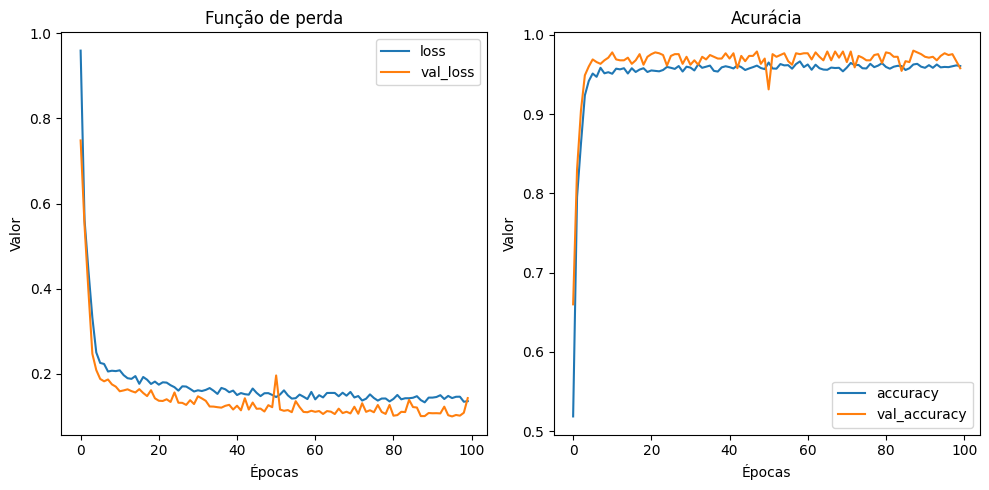

In [53]:
history_df = pd.DataFrame(history.history)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

history_df[['loss','val_loss']].plot(ax=axs[0])
axs[0].set_title('Função de perda')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Valor')

history_df[['accuracy','val_accuracy']].plot(ax=axs[1])
axs[1].set_title('Acurácia')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Valor')

fig.tight_layout()

plt.show()

##### II. Modelo mais parâmetros

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=243, input_shape=(2,), activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.Dense(units=81, activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(units=27, activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(units=9, activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(units=3, activation="relu", kernel_regularizer = keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation="sigmoid", kernel_regularizer = keras.regularizers.l2(0.01))
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 243)               729       
                                                                 
 dense_45 (Dense)            (None, 81)                19764     
                                                                 
 batch_normalization_24 (Bat  (None, 81)               324       
 chNormalization)                                                
                                                                 
 dense_46 (Dense)            (None, 27)                2214      
                                                                 
 batch_normalization_25 (Bat  (None, 27)               108       
 chNormalization)                                                
                                                                 
 dense_47 (Dense)            (None, 9)               

In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# Treine o modelo
history = model.fit(X_train, y_train, epochs=100, batch_size = 16, validation_split=0.2)

Epoch 1/100
225/225 [==============================] - 1s 6ms/step - loss: 0.7032 - accuracy: 0.9264 - val_loss: 0.7042 - val_accuracy: 0.8422
Epoch 2/100
225/225 [==============================] - 1s 6ms/step - loss: 0.4472 - accuracy: 0.9331 - val_loss: 0.4209 - val_accuracy: 0.9178
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3463 - accuracy: 0.9431 - val_loss: 0.2670 - val_accuracy: 0.9700
Epoch 4/100
225/225 [==============================] - 1s 6ms/step - loss: 0.3007 - accuracy: 0.9447 - val_loss: 0.2391 - val_accuracy: 0.9578
Epoch 5/100
225/225 [==============================] - 1s 6ms/step - loss: 0.2524 - accuracy: 0.9522 - val_loss: 0.2094 - val_accuracy: 0.9644
Epoch 6/100
225/225 [==============================] - 1s 6ms/step - loss: 0.2495 - accuracy: 0.9456 - val_loss: 0.1940 - val_accuracy: 0.9544
Epoch 7/100
225/225 [==============================] - 2s 7ms/step - loss: 0.2164 - accuracy: 0.9497 - val_loss: 0.1707 - val_accuracy: 0.9700

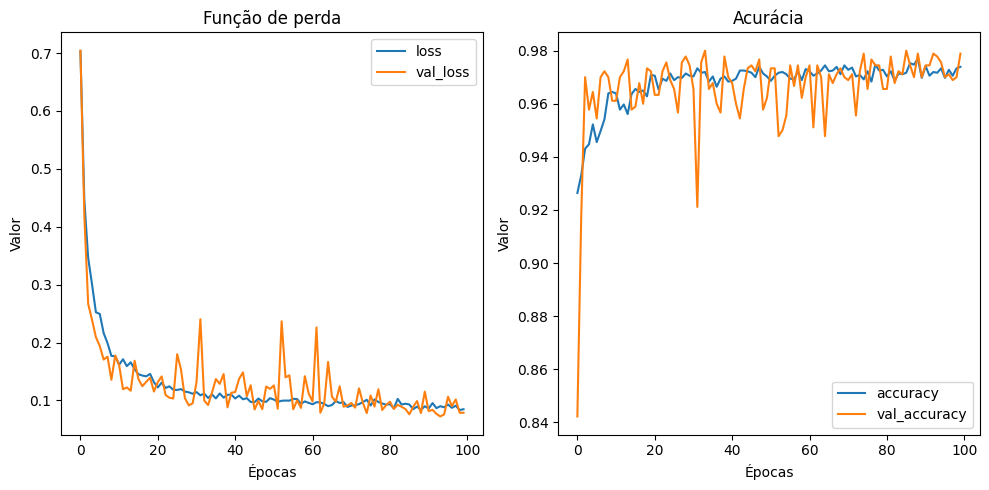

In [71]:
history_df = pd.DataFrame(history.history)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

history_df[['loss','val_loss']].plot(ax=axs[0])
axs[0].set_title('Função de perda')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Valor')

history_df[['accuracy','val_accuracy']].plot(ax=axs[1])
axs[1].set_title('Acurácia')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Valor')

fig.tight_layout()

plt.show()


Assim como no gráfico do item I. A distância não é grande entre o val_accuracy e accuracy, bem como o loss e val_loss, tirando o problema de overfitting do caminho. Percebe-se também que algumas linhas tem muitas irregularidades, o que não preocupa muito por dois fatores: o primeiro é que a escala dos gráficos é pequena; já o segundo é que as irregularidades não são grandes.

### 5) Conclusão

Os modelos e códigos aqui apresentados foram previamente selecionados, pois antes disso foram feitos vários testes e a influência deles com a acurácia do modelo. Dessa forma, vale ressaltar que não há uma fórmula de modelo de deep learning para conseguir uma boa performance em todos os tipos de problemas. Nesse caso, o algoritmo conseguiu uma boa acurácia com poucos neurônios e poucas camadas, mas também adquiriu boa performance com muitos neurônios e muitas camadas.

Testes como: muitos neurônios e poucas camadas ou muitas camadas com poucos neurônios em cada também foram feitos, mas não tiveram resultados tão satisfatórios como os apresentados acima.